<a href="https://colab.research.google.com/github/ViktorOtroschenko/Introduction_to_Neural_Networks/blob/Lesson4/Lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm.notebook import tqdm

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Lambda
from tensorflow.keras.layers.experimental.preprocessing import Resizing
from tensorflow.keras.losses import categorical_crossentropy

from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# загрузка тренировочных и тестовых данных
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# конвертация чисел из uint8 в float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# нормализация данных [0, 1]
X_train /= 255 
X_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

In [4]:
model = Sequential()

model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

hist = model.fit(x=X_train, y=y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=1)

test_score = model.evaluate(X_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/10
469/469 [==============================] - 35s 6ms/step - loss: 1.3631 - accuracy: 0.5577 - val_loss: 0.6921 - val_accuracy: 0.7411
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.6413 - accuracy: 0.7637 - val_loss: 0.6012 - val_accuracy: 0.7738
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5555 - accuracy: 0.7953 - val_loss: 0.5528 - val_accuracy: 0.8015
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5154 - accuracy: 0.8137 - val_loss: 0.5309 - val_accuracy: 0.8102
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4831 - accuracy: 0.8270 - val_loss: 0.4961 - val_accuracy: 0.8227
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4619 - accuracy: 0.8349 - val_loss: 0.4806 - val_accuracy: 0.8272
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4380 - accuracy: 0.8455 - val_loss: 0.4621 - val_accuracy: 0.8403
Epoch

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 5880)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                4

In [6]:
y_pred=model.predict(X_test)

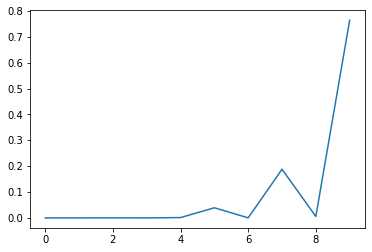

[5.1763582e-05 5.1389568e-05 4.0981476e-04 8.9274901e-05 1.3589780e-03
 3.9277177e-02 3.0498096e-04 1.8826210e-01 5.7265796e-03 7.6446784e-01]


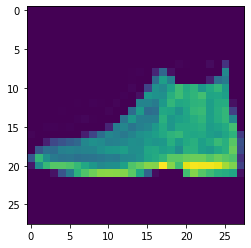

In [7]:
plt.plot(y_pred[0][:])
plt.show()
print(y_pred[0][:])
plt.imshow(X_test[0][:,:,0])
plt.show()

In [9]:
## 2. оценить рост точности при увеличении ширины сети (больше ядер)

In [10]:
for kernel in tqdm((2, 4, 8, 16, 32, 64, 128, 256)):
    
    model = Sequential([
        Conv2D(kernel, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"),
        AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
        Conv2D(kernel, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
        AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
        Conv2D(kernel, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
        Flatten(),
        Dense(84, activation='tanh'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(loss=categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])
    
    test_score = model.evaluate(X_test, y_test, verbose=0)
    
    hist_train = model.fit(x=X_train, y=y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=0)
    
    hh_train = model.evaluate(X_train, y_train, verbose=0)
    hh_test = model.evaluate(X_test, y_test, verbose=0)
    
    print(f'Accuracy at {kernel} kernels:')
    print(f'\tTrain: {hh_train[1]}')
    print(f'\tTest:  {hh_test[1]}')


Accuracy at 2 kernels:
	Train: 0.8033000230789185
	Test:  0.7950999736785889
Accuracy at 4 kernels:
	Train: 0.8316166400909424
	Test:  0.8173999786376953
Accuracy at 8 kernels:
	Train: 0.8456666469573975
	Test:  0.8323000073432922
Accuracy at 16 kernels:
	Train: 0.8589500188827515
	Test:  0.8464999794960022
Accuracy at 32 kernels:
	Train: 0.8666999936103821
	Test:  0.8532000184059143
Accuracy at 64 kernels:
	Train: 0.8672999739646912
	Test:  0.8549000024795532
Accuracy at 128 kernels:
	Train: 0.8717333078384399
	Test:  0.8557999730110168
Accuracy at 256 kernels:
	Train: 0.8699833154678345
	Test:  0.8560000061988831



In [12]:
!nvidia-smi

Sun May  9 20:22:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    32W /  70W |   4944MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# При увеличении ширины сети (увеличение количества ядер) - наблюдается рост точности.

In [ ]:
3. оценить рост точности при увеличении глубины сети (больше слоев)

In [14]:
# Построим первую модель в 3-х вариантах - по 1, 2, 3 слоя

one_layers_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"),
    Flatten(),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])

two_layers_model  = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"),
    AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    Flatten(),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])

three_layers_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"),
    AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    Flatten(),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')
])

In [15]:
for model in (one_layers_model, two_layers_model, three_layers_model):

  # compile
  model.compile(loss=categorical_crossentropy, 
                optimizer='nadam', 
                metrics=["accuracy"])
  
  # calc errors
  test_score = model.evaluate(X_test, y_test, verbose=0)

  # fitting
  hist = model.fit(x=X_train,y=y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=0)
  
  hist_train = model.evaluate(X_train, y_train, verbose=0)
  hist_test = model.evaluate(X_test, y_test, verbose=0)

  print(f'Accuracy {model}:')
  print(f'\tTrain: {hist_train[1]}')
  print(f'\tTest: {hist_test[1]}')

Accuracy <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fc5a0263950>:
	Train: 0.9518666863441467
	Test: 0.8873999714851379
Accuracy <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fc5a00b3e50>:
	Train: 0.9363833069801331
	Test: 0.8877000212669373
Accuracy <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fc5a0040f10>:
	Train: 0.904533326625824
	Test: 0.8794000148773193


In [16]:
# Вывод: При увеличении глубины сети (увеличение количества слоев) - точность падает!

In [ ]:
4. сравнить с точностью полносвязной сети для этой выборки

In [ ]:
Полносвязная сеть с задания 2 урока имела следующую точность:
nadam optimizer, accurasy:
	Train: 0.8830666542053223
	Test:  0.8640999794006348

In [ ]:
Сейчас же с таким же оптимайзером, мы имеем:
Train:  0.9363833069801331
	Test: 0.8877000212669373

In [ ]:
По таким результатам, можно сделать вывод, что разница между сверточной и полносвязной нейронной сетью у нас вышла небольшая